<a href="https://colab.research.google.com/github/sonalikaus/Cardiovascular-risk-prediction---Classification-Project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [ ]:
# mounting drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLASSIFICATION CAPSTONE/Copy of data_cardiovascular_risk.csv')

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

##Feature Engineering

##As id and education has not direct relation with Heart disease, we can drop these 2 columns

In [ ]:
##Dropping id and education
df.drop(['id','education'],axis=1,inplace=True)

##Creating new variable by combining the sysBP and diaBP

In [ ]:
# Combining systolic and diastolic blood pressure column through formula 
df['map']=round((df['sysBP']+2*df['diaBP'])/3,3) 
# droping systolic and diastolic blood pressure column
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [ ]:
##Relocating newly formed MAP column 
df=df[['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose','map','Heart Disease']]

##Renaming Target Variable

In [ ]:
df = df.rename(columns={'TenYearCHD':'Heart Disease'})

In [ ]:
df.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,Heart Disease,map
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3376.000000,3389.000000,3086.000000,3390.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,25.794964,75.977279,82.086520,0.150737,99.455751
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,4.115449,11.971868,24.244753,0.357846,14.581186
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,15.960000,45.000000,40.000000,0.000000,62.500000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,23.020000,68.000000,71.000000,0.000000,89.333000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,25.380000,75.000000,78.000000,0.000000,97.667000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,28.040000,83.000000,87.000000,0.000000,107.291500
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,56.800000,143.000000,394.000000,1.000000,188.333000


##Handling Missing Values

In [ ]:
##Checking missing Values
df.isna().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
BMI                 14
heartRate            1
glucose            304
map                  0
Heart Disease        0
dtype: int64

In [ ]:
##Missing value percentage
missn_percen = round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)
print(missn_percen)

glucose            8.97
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
age                0.00
sex                0.00
is_smoking         0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
map                0.00
Heart Disease      0.00
dtype: float64


##Dealing with missing values of glucose column

  Glucose has 304 missing values. These null values can be attributed to people who doesn't have diabetes. if this assumption turns out true, we can impute these nulls with the minimum value of glucose level.


In [ ]:
##Finding null values with no diabetes
df[df['glucose'].isnull()][['diabetes','glucose']]

,diabetes,glucose
9,0,NaN
10,0,NaN
36,0,NaN
38,0,NaN
55,0,NaN
...,...,...
3289,0,NaN
3290,0,NaN
3349,0,NaN
3370,0,NaN


In [ ]:
##Imputing the nulls with min value of glucose
df['glucose']= df['glucose'].fillna('40')

In [ ]:
##Checking missing value after imputation
df['glucose'].isnull().sum()

0

##Handling missing values in BPMeds

In [ ]:
##Relating null values of BPMeds with Diabetes
df[df['BPMeds'].isnull()][['diabetes','BPMeds']]

,diabetes,BPMeds
8,0,NaN
102,0,NaN
128,0,NaN
174,0,NaN
194,0,NaN
265,0,NaN
304,0,NaN
656,0,NaN
863,0,NaN
864,0,NaN


Most of the nulls are patients without Diabetes; however, there is one exception that must be addressed before we can impute the nulls with zero.

BPMeds at index 1367 is null, but has diabetes value as 1. 

This exception will be imputed with the value of 1 .The remaning null values will be imputed with 'None' as they corresond to patients with no diabetes.

In [ ]:
# Imputing the exception
df.iloc[1367,df.columns.get_loc('BPMeds')]= 1

In [ ]:
# Imputing the remaining nulls as None
df['BPMeds']= df['BPMeds'].fillna('0')

In [ ]:
df['BPMeds'].isnull().sum()

0

##Handling null values of totchol

Attributing null values of totchol with the people not having Diabetes. If, it turns out to be true then these null values can be imputed with the average value of totchol

In [ ]:
df[df['totChol'].isnull()][['diabetes','totChol']]

,diabetes,totChol
10,0,NaN
69,0,NaN
254,0,NaN
290,0,NaN
554,0,NaN
625,0,NaN
700,0,NaN
732,0,NaN
797,0,NaN
808,0,NaN


In [ ]:
##Replacing Missing value of totchol with min value
df['totChol']= df['totChol'].fillna(df['totChol'].mean())

##Handling Missing Values in cigsPerDay  

As, it has very less percentage of null values . These values can be imputed with the most occuring value.

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

##Handling Missing Values in BMI

As, it has very less percentage of null values . These values can be imputed with the most occuring value.

In [ ]:
df['BMI']=df['BMI'].fillna(df['BMI'].mode()[0])

##Handling Missing Values in heartRate  

As, it has very less percentage of null values . These values can be imputed with the most occuring value.

In [ ]:
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   object 
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   BMI              3390 non-null   float64
 10  heartRate        3390 non-null   float64
 11  glucose          3390 non-null   object 
 12  map              3390 non-null   float64
 13  Heart Disease    3390 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 370.9+ KB


##Dealing with Outliers

In [ ]:
# Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O'and var not in ['Heart Disease','diabetes','prevalentStroke','prevalentHyp']]
print('There are {} numerical variables'.format(len(numerical)))

There are 6 numerical variables


In [ ]:
numerical

['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'map']

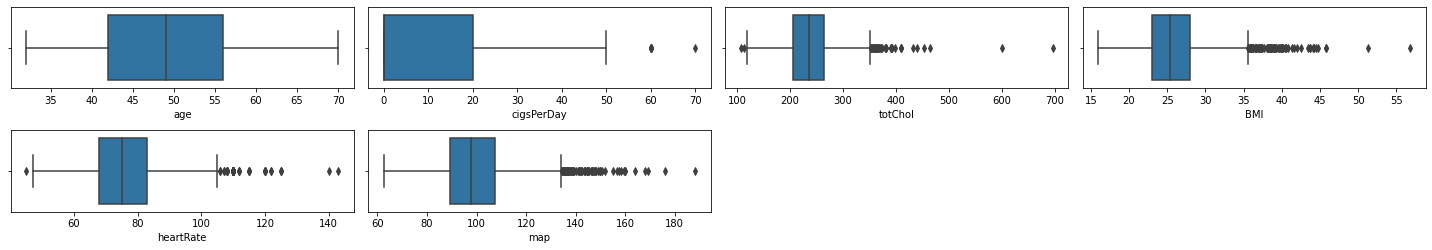

In [ ]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

In [ ]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in df.describe().columns:
  upper_lim = df[col].quantile(.95)
  lower_lim = df[col].quantile(.05)
  df.loc[(df[col] > upper_lim),col] = upper_lim
  df.loc[(df[col] < lower_lim),col] = lower_lim

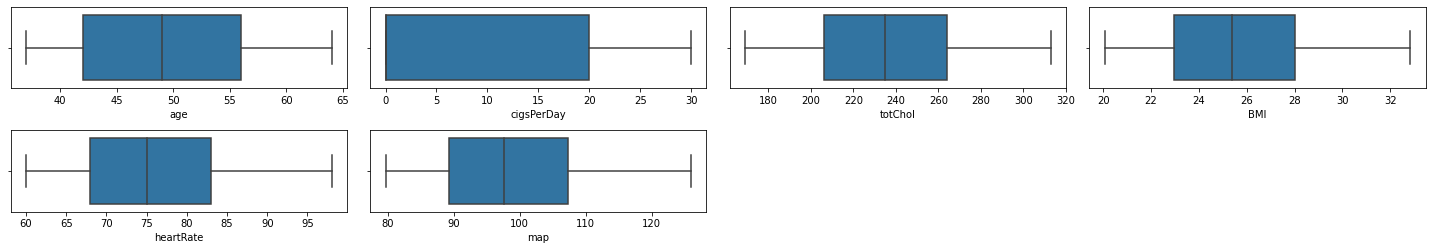

In [ ]:
##finding result 
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col])
    num_it+=1
    
plt.tight_layout()

Now, there is no outliers present in our dataset.

##Exploratory Data Analysis

## 1.Number of people having heart disease and not having heart disease

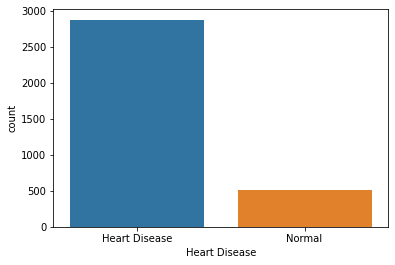

In [ ]:
# visualize the target variable
g = sns.countplot(df['Heart Disease'])
g.set_xticklabels(['Heart Disease','Normal'])
plt.show()

Given dataset is highly imbalanced which will be dealt further at the time of model building.

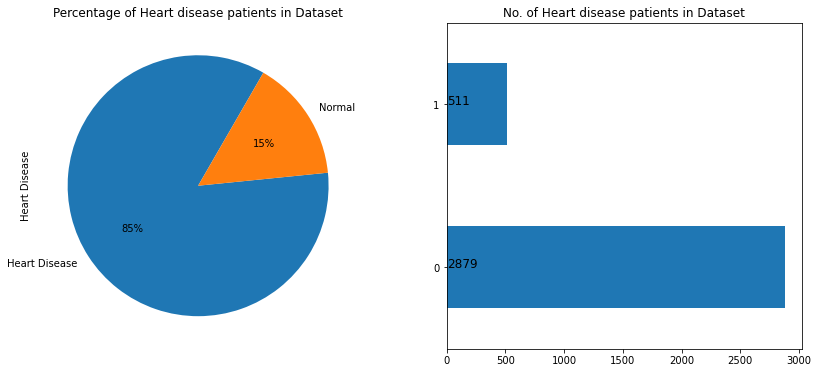

In [ ]:
# Plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['Heart Disease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df['Heart Disease'].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df['Heart Disease'].value_counts().values): ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

Over 85% of the people have heart disease

##Genderwise distribution

Text(0.5, 1.0, 'Distribution of Gender')

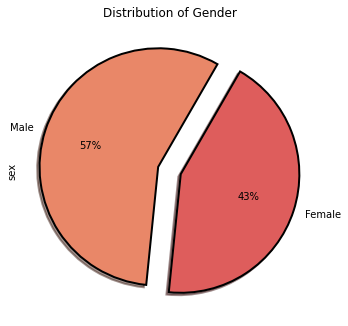

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df['sex'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("flare",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")


Above plot showing us that males have higher percentage of Cardiovascular risk as compared to females.

##Age Distribution

In [ ]:
# creating separate df for normal and heart patients

patient =df[df['Heart Disease']==1]

normal =df[df['Heart Disease']==0]

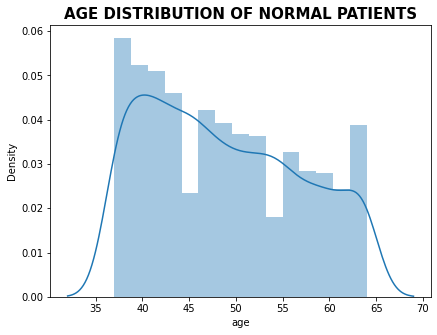

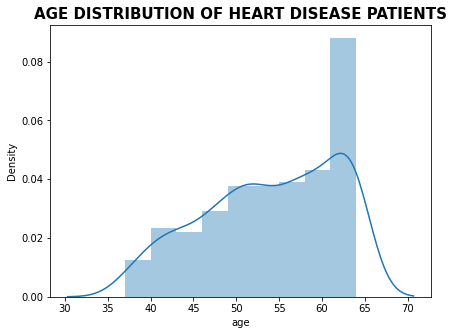

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(normal['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(patient['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

plt.show()

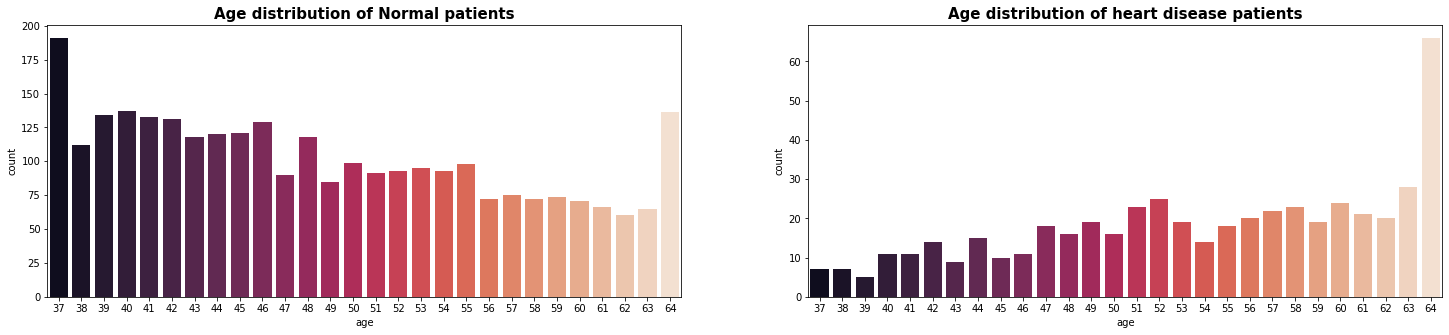

In [ ]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['age'], palette='rocket')
plt.title('Age distribution of Normal patients', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['age'], palette='rocket')
plt.title('Age distribution of heart disease patients', fontsize=15, weight='bold' )
plt.show()

##Gender Dstribution

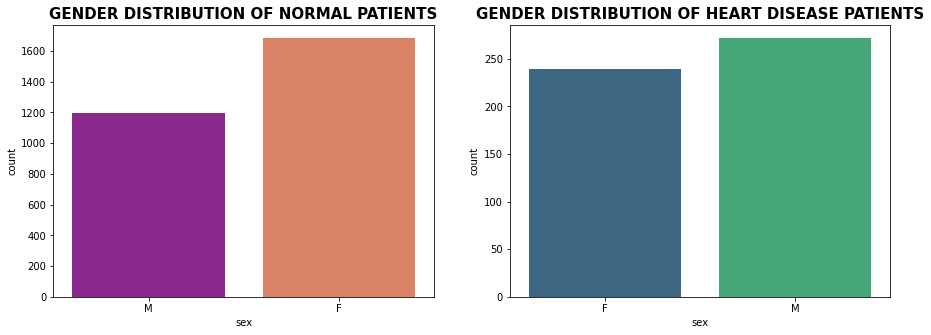

In [ ]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['sex'], palette='plasma')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

##Cigrette Consumption

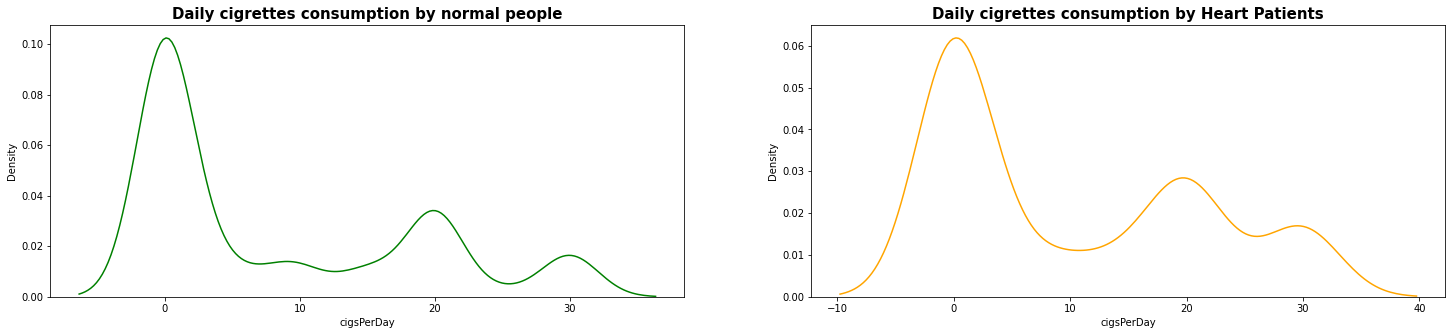

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.kdeplot(x='cigsPerDay',data = normal, color='green')
plt.title('Daily cigrettes consumption by normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x='cigsPerDay',data = patient, color='orange')
plt.title('Daily cigrettes consumption by Heart Patients', fontsize=15, weight='bold' )
plt.show()

##BMI Distribution

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


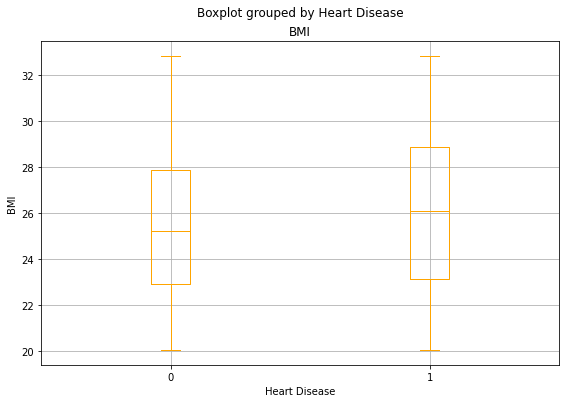

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'BMI', by = 'Heart Disease', ax = ax, color='orange')
ax.set_ylabel("BMI")
plt.show()

##Cholestrol Distribution

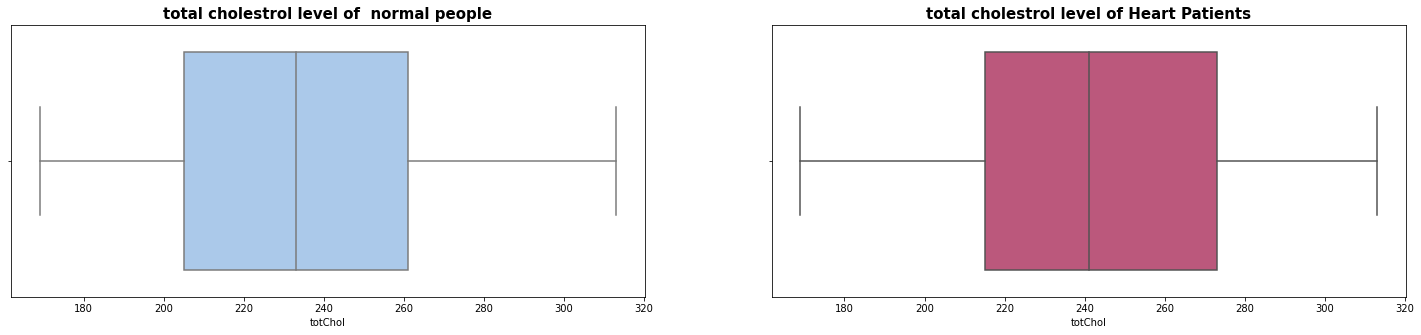

In [ ]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='totChol',data = normal, palette='pastel')
plt.title('total cholestrol level of  normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='totChol',data = patient, palette='plasma')
plt.title('total cholestrol level of Heart Patients', fontsize=15, weight='bold' )
plt.show()

Total Cholestrol level of heart patient seems to be slightly higher than normal patient. People with similar levels of cholestrol have got heart disease as well as are free from heart disease. Clearly, there is no direct correlation of heart disease with the cholestrol level.



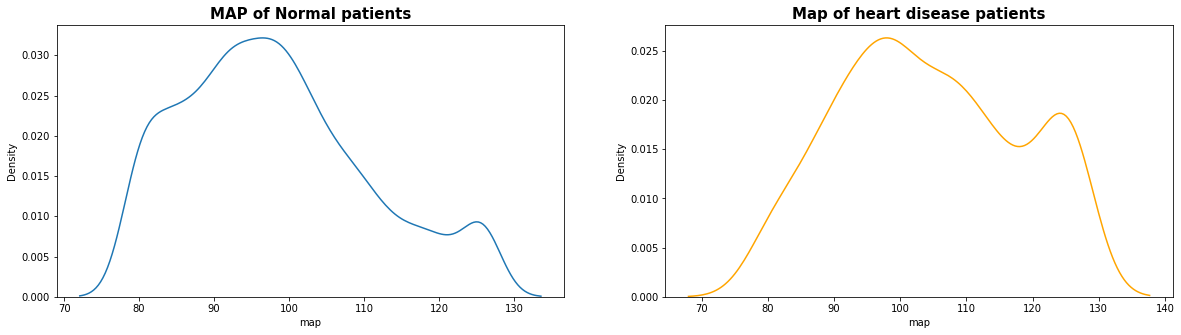

In [ ]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(20,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.kdeplot(x=normal['map'], palette='')
plt.title('MAP of Normal patients', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.kdeplot(x=patient['map'], color= 'orange')
plt.title('Map of heart disease patients', fontsize=15, weight='bold' )
plt.show()

##Dependent and independent variables

In [ ]:
# Creating the dataset with all independent variables
X = df.iloc[:,:-1]

# Creating the dataset with the dependent variable
y = df.iloc[:,-1]

##Level Encoding

In [ ]:
##Level Encoding 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['sex','is_smoking']] = \
X.loc[:,['sex','is_smoking']].apply(enc.fit_transform)
X.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,map
0,64,0,1,3.0,0.0,0,0,0,221.0,22.91,90.0,80.0,106.000
1,37,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,121.333
2,46,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,86.000
3,50,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,111.333
4,64,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,102.167


##Model Building

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

##Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

##1.KNN model without imbalancing the Dataset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)


0.8279252704031466


col_0,0,1
Heart Disease,,
0,825,27
1,148,17


This model showing the accuracy of 83.7% without Balancing the dataset. Let's Balanced the dataset and then check the accuracy.

##Handling Data Imbalance using SMOTE

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

In [ ]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [ ]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
from collections import Counter

In [ ]:
#the numbers after SMOTE
num_before = dict(Counter(y))
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{1: 511, 0: 2879} {0: 2878, 1: 2303}


##KNN using Balanced dataset using SMOTE

In [ ]:
##KNN on balanced dataset
model.fit(X_train,y_train)
y_pred_knn = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_knn))
pd.crosstab(y_test,y_pred_knn)

0.7290260366441659


col_0,0,1
Heart Disease,,
0,398,190
1,91,358


##Model Evaluation

In [ ]:
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,KNN,0.729026,0.653285,0.797327,0.676871,0.718154,0.737099


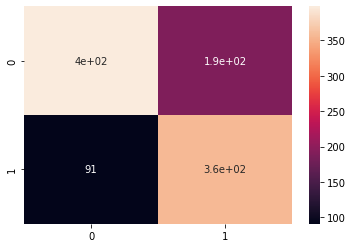

In [ ]:
CM=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

evaluation_metrics =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics

##Choosing the K value

##Finding Best Value of K using Cross Validation Accuracy

In [ ]:
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())
# 0.973333333333

[0.8259587  0.82743363 0.83038348 0.83775811 0.83775811]
0.831858407079646


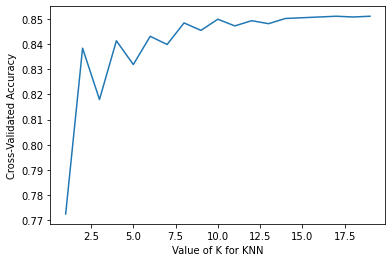

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 20
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Here, we can see the best value of K for our model is between 5-15. For all the values above 5, CV accuracy is increasing and then getting constant.

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
clf.coef_

array([[ 0.59648436, -0.23273795, -0.51625179,  0.87876349,  0.15175646,
         0.        , -0.36107301,  0.        ,  0.0849298 ,  0.07761847,
        -0.09023886,  0.30438456,  0.5252517 ]])

In [ ]:
clf.intercept_

array([-0.27048123])

In [ ]:
train_pred = clf.predict_proba(X_train)
test_pred = clf.predict_proba(X_test)

In [ ]:
test_pred

array([[0.60991171, 0.39008829],
       [0.47429154, 0.52570846],
       [0.34359512, 0.65640488],
       ...,
       [0.11385515, 0.88614485],
       [0.8892229 , 0.1107771 ],
       [0.76456056, 0.23543944]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
X_pred_lr = clf.predict(X_train)
y_pred_lr = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_lr))

0.6837029893924783


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_imputed, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

##Evaluation metrics

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,LogisticReg,0.683703,0.658824,0.604752,0.747387,0.630631,0.676069


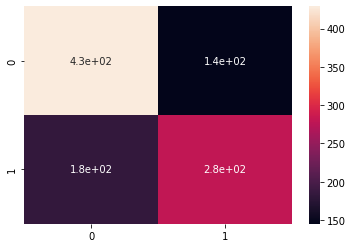

In [ ]:
CM=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

evaluation_metrics =pd.DataFrame([['LogisticReg',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_imputed, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

##3.Support Vector CLassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,SupportVector,0.67406,0.622517,0.628062,0.709184,0.625277,0.668623


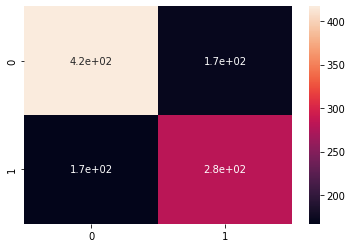

In [ ]:

CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

evaluation_metrics =pd.DataFrame([['SupportVector',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[1.10.100,1000], 'kernel:['linear']},


##4.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

Model Evluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,DecisionTree,0.800386,0.75498,0.818575,0.785714,0.785492,0.802144


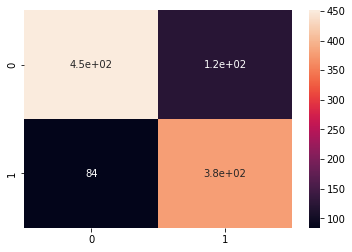

In [ ]:
CM=confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_dtc)
roc=roc_auc_score(y_test, y_pred_dtc)
prec = precision_score(y_test, y_pred_dtc)
rec = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)

evaluation_metrics =pd.DataFrame([['DecisionTree',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,GradientBoosting,0.779171,0.789604,0.688985,0.851916,0.735871,0.770451


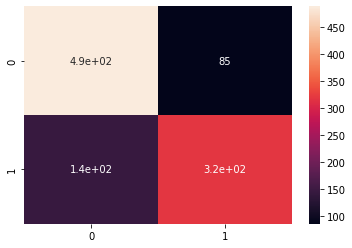

In [ ]:
CM=confusion_matrix(y_test,y_pred_gbm)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_gbm)
roc=roc_auc_score(y_test, y_pred_gbm)
prec = precision_score(y_test, y_pred_gbm)
rec = recall_score(y_test, y_pred_gbm)
f1 = f1_score(y_test, y_pred_gbm)

evaluation_metrics =pd.DataFrame([['GradientBoosting',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics

In [ ]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators= 500)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,GradientBoosting,0.861138,0.886076,0.77951,0.923469,0.829384,0.85149


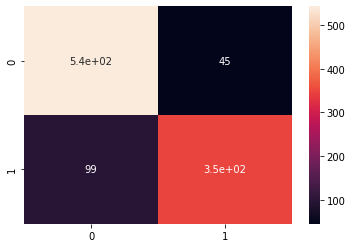

In [ ]:
CM=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

evaluation_metrics =pd.DataFrame([['GradientBoosting',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])

evaluation_metrics